In [11]:

import sklearn
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pickle



In [4]:

iris = load_iris()
X = iris['data']
y = iris['target']
class_names = iris['target_names']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



In [5]:


X_train.shape, y_train.shape, X_test.shape, y_test.shape



((120, 4), (120,), (30, 4), (30,))

In [4]:



# tuned_params = load_a_dict(
#     name=configs.specifier,
#     save_path=configs.params_path
#         )
# tuned_params



In [5]:
tuned_params = dict(
    [('activation', 'tanh'),
     ('hidden_layer_sizes', 158),
     ('max_iter', 1000),
     ('solver', 'lbfgs'),
     ('verbose', True)]
)

tuned_params

{'activation': 'tanh',
 'hidden_layer_sizes': 158,
 'max_iter': 1000,
 'solver': 'lbfgs',
 'verbose': True}

In [6]:


mdl = MLPClassifier(**tuned_params)
mdl




MLPClassifier(activation='tanh', hidden_layer_sizes=158, max_iter=1000,
              solver='lbfgs', verbose=True)

In [7]:

mdl.fit(X_train, y_train, )



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1267     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02126D+00    |proj g|=  1.69981D-01

At iterate    1    f=  8.83459D-01    |proj g|=  3.35410D-01

At iterate    2    f=  6.86707D-01    |proj g|=  2.09449D-01

At iterate    3    f=  4.65864D-01    |proj g|=  1.26340D-01

At iterate    4    f=  4.04445D-01    |proj g|=  6.58341D-02

At iterate    5    f=  3.28655D-01    |proj g|=  1.04445D-01

At iterate    6    f=  2.80601D-01    |proj g|=  7.46869D-02

At iterate    7    f=  2.43246D-01    |proj g|=  6.62325D-02

At iterate    8    f=  1.53031D-01    |proj g|=  2.44599D-01

At iterate    9    f=  1.02426D-01    |proj g|=  1.50251D-01

At iterate   10    f=  9.21696D-02    |proj g|=  4.73169D-02

At iterate   11    f=  8.38867D-02    |proj g|=  3.74367D-02

At iterate   12    f=  7.91791D-02    |proj g|=  2.93999D-02

At iterate   13    f=  7.5


At iterate  329    f=  1.47280D-03    |proj g|=  4.15832D-04

At iterate  330    f=  1.46167D-03    |proj g|=  1.67868D-03

At iterate  331    f=  1.44283D-03    |proj g|=  7.15318D-04

At iterate  332    f=  1.42327D-03    |proj g|=  8.12760D-04

At iterate  333    f=  1.40860D-03    |proj g|=  3.12385D-04

At iterate  334    f=  1.39874D-03    |proj g|=  4.51709D-04

At iterate  335    f=  1.38117D-03    |proj g|=  5.29595D-04

At iterate  336    f=  1.36094D-03    |proj g|=  6.83911D-04

At iterate  337    f=  1.35168D-03    |proj g|=  7.16332D-04

At iterate  338    f=  1.32585D-03    |proj g|=  8.19412D-04

At iterate  339    f=  1.28534D-03    |proj g|=  1.10308D-03

At iterate  340    f=  1.26502D-03    |proj g|=  2.41642D-03

At iterate  341    f=  1.24599D-03    |proj g|=  6.60063D-04

At iterate  342    f=  1.22098D-03    |proj g|=  1.56426D-03

At iterate  343    f=  1.19938D-03    |proj g|=  7.78150D-04

At iterate  344    f=  1.18788D-03    |proj g|=  8.72190D-04

At iter

MLPClassifier(activation='tanh', hidden_layer_sizes=158, max_iter=1000,
              solver='lbfgs', verbose=True)

In [12]:

print("Trainin is completed!")



Trainin is completed!


In [9]:
y_prob = mdl.predict_proba(X_test)
y_pred = mdl.predict(X_test)



In [10]:
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [11]:
y_prob.argmax(axis=1)

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [12]:
sklearn.metrics.roc_auc_score(y_true=y_test, y_score=y_prob, multi_class='ovr')

1.0

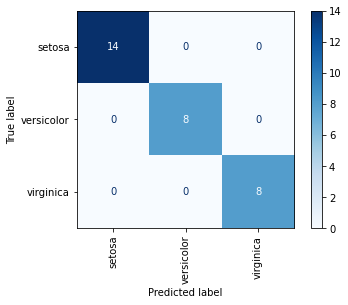

In [13]:


disp = sklearn.metrics.plot_confusion_matrix(
    mdl, X_test, y_test, 
    display_labels=class_names, 
    cmap=plt.cm.Blues, 
    xticks_rotation='vertical'
)




In [6]:


filename = "mlp_iris.pickle"


In [15]:


pickle.dump(mdl, open(filename, "wb"))


In [7]:


loaded_model = pickle.load(open(filename, "rb"))


In [8]:
y_prob_ = loaded_model.predict_proba(X_test)
y_pred_ = loaded_model.predict(X_test)

In [9]:
sklearn.metrics.roc_auc_score(y_true=y_test, y_score=y_prob_, multi_class='ovr')

1.0

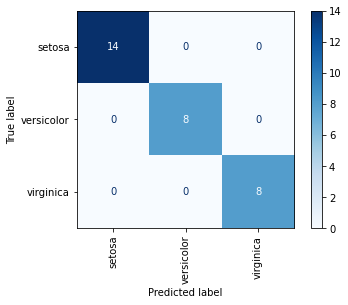

In [10]:




disp = sklearn.metrics.plot_confusion_matrix(
    loaded_model, X_test, y_test, 
    display_labels=class_names, 
    cmap=plt.cm.Blues, 
    xticks_rotation='vertical'
)


